# 1.Introduction
This Kaggle competition involves predicting the probability of machine failure based on the given parameters of a machine. The goal is to provide a model that can accurately predict the failure likelihood, helping in proactive maintenance and potentially avoiding catastrophic breakdowns.

## 1.1. Problem Summary
Participants are tasked with the creation of a predictive model that estimates the likelihood of machine failure. The challenge lies in the binary classification problem, and the evaluation metric is the area under the ROC curve (AUC-ROC) between the predicted probability and the observed target.

## 1.2. Dataset
The dataset used in this competition was generated from a deep learning model trained on Machine Failure Predictions. It encompasses both training and testing data. The training set includes information on machine parameters like air temperature, process temperature, rotational speed, torque, tool wear, and a binary indicator of machine failure. The testing set, on the other hand, requires the participants to predict the probability of machine failure.

## 1.3.Feature Characteristics
The dataset for this competition consists of multiple sensor readings and conditions that are essential to predicting machine failure. Both the training and test datasets are generated from a deep learning model that was initially trained on Machine Failure Predictions. However, it's important to note that while the distributions of the features are similar, they are not identical to the original data. This adds an extra layer of complexity and challenge to the competition.

The dataset comprises of the following features:
- ID: This is a unique identifier assigned to each record in the dataset. It helps in indexing and referencing each individual record.

- Product Id: Combination of Type variable followed by a identifier number

- Type: This refers to the type of machine for which the readings are recorded. Understanding the type of machine can provide insight into the kind of operations it performs, which can in turn be linked to the probability of failure.

- Air temperature [K]: This is the ambient temperature around the machine, measured in Kelvin. It could be an important factor as machines might behave differently under different ambient temperatures.

- Process temperature [K]: This represents the temperature of the process in which the machine is engaged, also measured in Kelvin. Certain processes might cause the machine to heat up and thus increase the chances of failure.

- Rotational speed [rpm]: This is the speed at which the machine operates. It is measured in rotations per minute (rpm). Higher speeds could potentially lead to increased wear and tear.

- Torque [Nm]: This is a measure of the force that causes the machine to rotate. High torque might indicate high load on the machine, which could increase the likelihood of failure.

- Tool wear [min]: This feature indicates the degree of wear and tear the machine has undergone. This is measured in minutes and high tool wear might indicate that the machine is due for maintenance.

Machine failure: This is the target variable, a binary indicator specifying whether the machine failed (1) or not (0).

In addition to these, there are other failure modes captured in the dataset:

- TWF: Tool wear failure. This indicates whether the machine failed due to tool wear.
- HDF: Heat dissipation failure. This indicates whether the machine failed due to an inability to dissipate heat.
- PWF: Power failure. This indicates whether the machine failed due to a power problem.
- OSF: Overstrain failure. This indicates whether the machine failed due to being overstrained.
- RNF: Random failure. This indicates whether the machine failed due to a random, unspecified issue.
These additional failure modes can provide more context to the machine failure and could be crucial in developing a comprehensive predictive model. Understanding the causes of failure can be instrumental in devising preventative measures and maintenance schedules in real-world scenarios.

The provided train.csv file contains the training data with the target variable 'Machine failure', while the test.csv file contains test data for which participants need to predict the probability of machine failure. A sample_submission.csv file is also provided to guide participants on how to format their predictions for submission.

## 1.4.Methodology
Participants are encouraged to employ machine learning techniques, including but not limited to, traditional supervised learning methods, ensemble methods, and deep learning to create their predictive models. Since the dataset is derived from a deep learning model, strategies that incorporate deep learning might show potential.

The ultimate aim is to produce a model that not only performs well on the given training data but also generalizes effectively to unseen data in the test set. Therefore, techniques such as cross-validation, feature engineering, feature selection, and hyperparameter tuning could be useful in enhancing model performance

# Data processing

## Import and basic analysis

In [12]:
import pandas as pd

X_train = pd.read_csv('input/train.csv')
X_original = pd.read_csv('input/machine_failure.csv')
X_test = pd.read_csv('input/test.csv')

id_test = X_test['id']

In [13]:
def clean_column_names(df):
    df.columns = df.columns.str.replace('[', '')
    df.columns = df.columns.str.replace(']', '')
    df.columns = df.columns.str.replace(' ', '_')
    df.columns = df.columns.str.replace(':', '')
    return df

X_train = clean_column_names(X_train)
X_test = clean_column_names(X_test)
X_original = clean_column_names(X_original)



In [14]:
# Shape of the data
print('Shape of the training data: ', X_train.shape)
print('Shape of the original data: ', X_original.shape)
print('Shape of the testing data: ', X_test.shape)

Shape of the training data:  (136429, 14)
Shape of the original data:  (10000, 14)
Shape of the testing data:  (90954, 13)


In [15]:
X_train.head()

,id,Product_ID,Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Machine_failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [16]:
X_train.describe()

,id,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Machine_failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
X_original.describe()

,UDI,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Machine_failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     136429 non-null  int64  
 1   Product_ID             136429 non-null  object 
 2   Type                   136429 non-null  object 
 3   Air_temperature_K      136429 non-null  float64
 4   Process_temperature_K  136429 non-null  float64
 5   Rotational_speed_rpm   136429 non-null  int64  
 6   Torque_Nm              136429 non-null  float64
 7   Tool_wear_min          136429 non-null  int64  
 8   Machine_failure        136429 non-null  int64  
 9   TWF                    136429 non-null  int64  
 10  HDF                    136429 non-null  int64  
 11  PWF                    136429 non-null  int64  
 12  OSF                    136429 non-null  int64  
 13  RNF                    136429 non-null  int64  
dtypes: float64(3), int64(9), object(2)
m

In [19]:
X_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UDI                    10000 non-null  int64  
 1   Product_ID             10000 non-null  object 
 2   Type                   10000 non-null  object 
 3   Air_temperature_K      10000 non-null  float64
 4   Process_temperature_K  10000 non-null  float64
 5   Rotational_speed_rpm   10000 non-null  int64  
 6   Torque_Nm              10000 non-null  float64
 7   Tool_wear_min          10000 non-null  int64  
 8   Machine_failure        10000 non-null  int64  
 9   TWF                    10000 non-null  int64  
 10  HDF                    10000 non-null  int64  
 11  PWF                    10000 non-null  int64  
 12  OSF                    10000 non-null  int64  
 13  RNF                    10000 non-null  int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 1.1+ M

In [20]:
X_train.drop(['id'], axis=1, inplace=True)
X_test.drop(['id'], axis=1, inplace=True)
X_original.drop(['UDI'], axis=1, inplace=True)

# EDA

## Product ID transformation

In [21]:
## Delete first letter of the column "Product ID"
X_train['Product_ID'] = X_train['Product_ID'].str[1:].astype(int)
X_test['Product_ID'] = X_test['Product_ID'].str[1:].astype(int)
X_original['Product_ID'] = X_original['Product_ID'].str[1:].astype(int)

## All cat Features Dataset

In [22]:
X_ = pd.concat([X_train, X_original], axis=0)
X_train_CAT = X_.astype(str)
X_test_CAT = X_test.astype(str)

## Previous transformations: OHE for 'Type' feature

In [10]:
# OHE of Type feature of X_train
X_train = pd.concat([X_train, pd.get_dummies(X_train['Type'], prefix='Type').astype(int)], axis=1)
X_train.drop('Type', axis=1, inplace=True)

# OHE of Type feature of X_test
X_test = pd.concat([X_test, pd.get_dummies(X_test['Type'], prefix='Type').astype(int)], axis=1)
X_test.drop('Type', axis=1, inplace=True)

# OHE of Type feature of X_original
X_original = pd.concat([X_original, pd.get_dummies(X_original['Type'], prefix='Type').astype(int)], axis=1)
X_original.drop('Type', axis=1, inplace=True)

## EDA - Exploratory Data Analysis

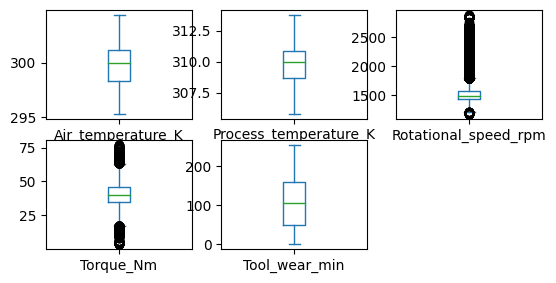

In [12]:
import matplotlib.pyplot as plt

# Individuals boxplot for each feature of the training data without id column
X_train.iloc[:,1:6].plot(kind='box', subplots=True, layout=(3, 3), sharex=False, sharey=False)
plt.rcParams['figure.figsize'] = (14, 14)
plt.show()

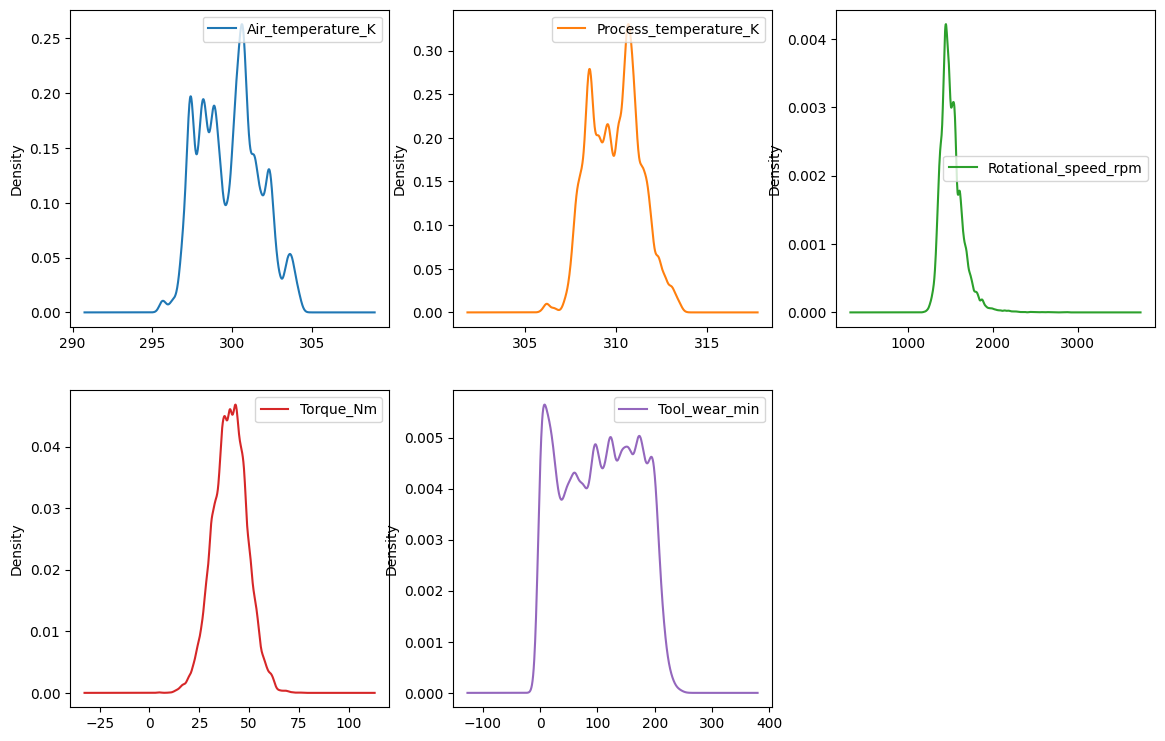

In [13]:
# Density function for each feature of the training data without id column
X_train.iloc[:,1:6].plot(kind='density', subplots=True, layout=(3, 3), sharex=False, sharey=False)
plt.rcParams['figure.figsize'] = (14, 14)
plt.show()

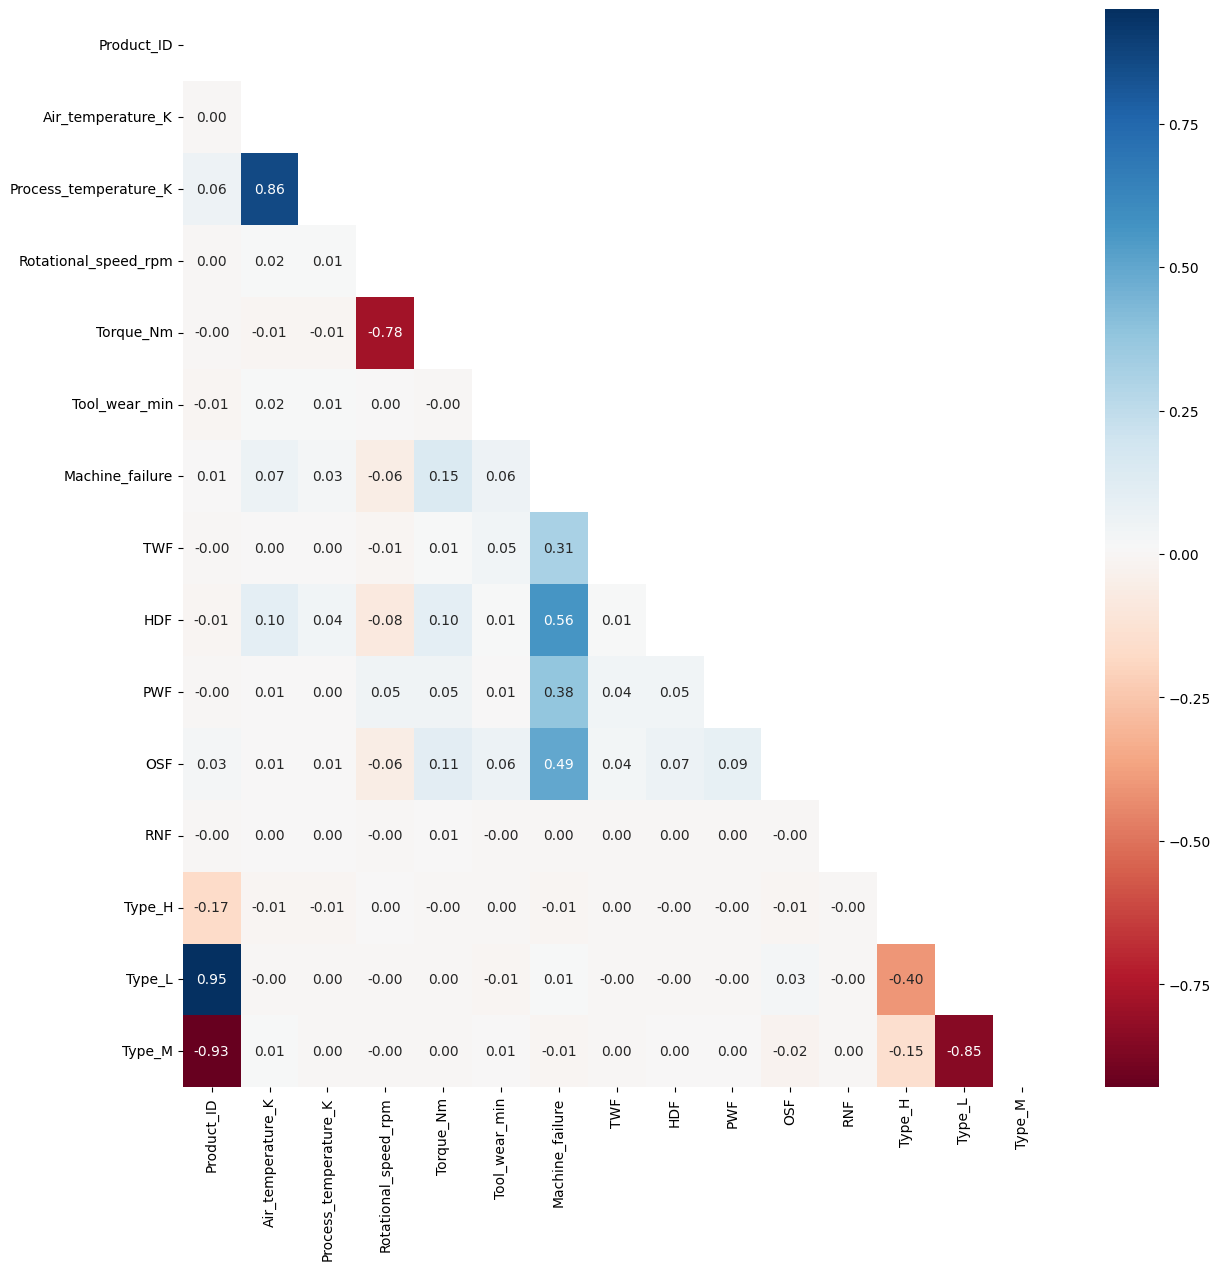

In [14]:
# Correlation matrix for the training data with only inferior triangle
import seaborn as sns
import numpy as np

corr = X_train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap='RdBu', annot=True, fmt='.2f')
plt.rcParams['figure.figsize'] = (10, 10)
plt.show()

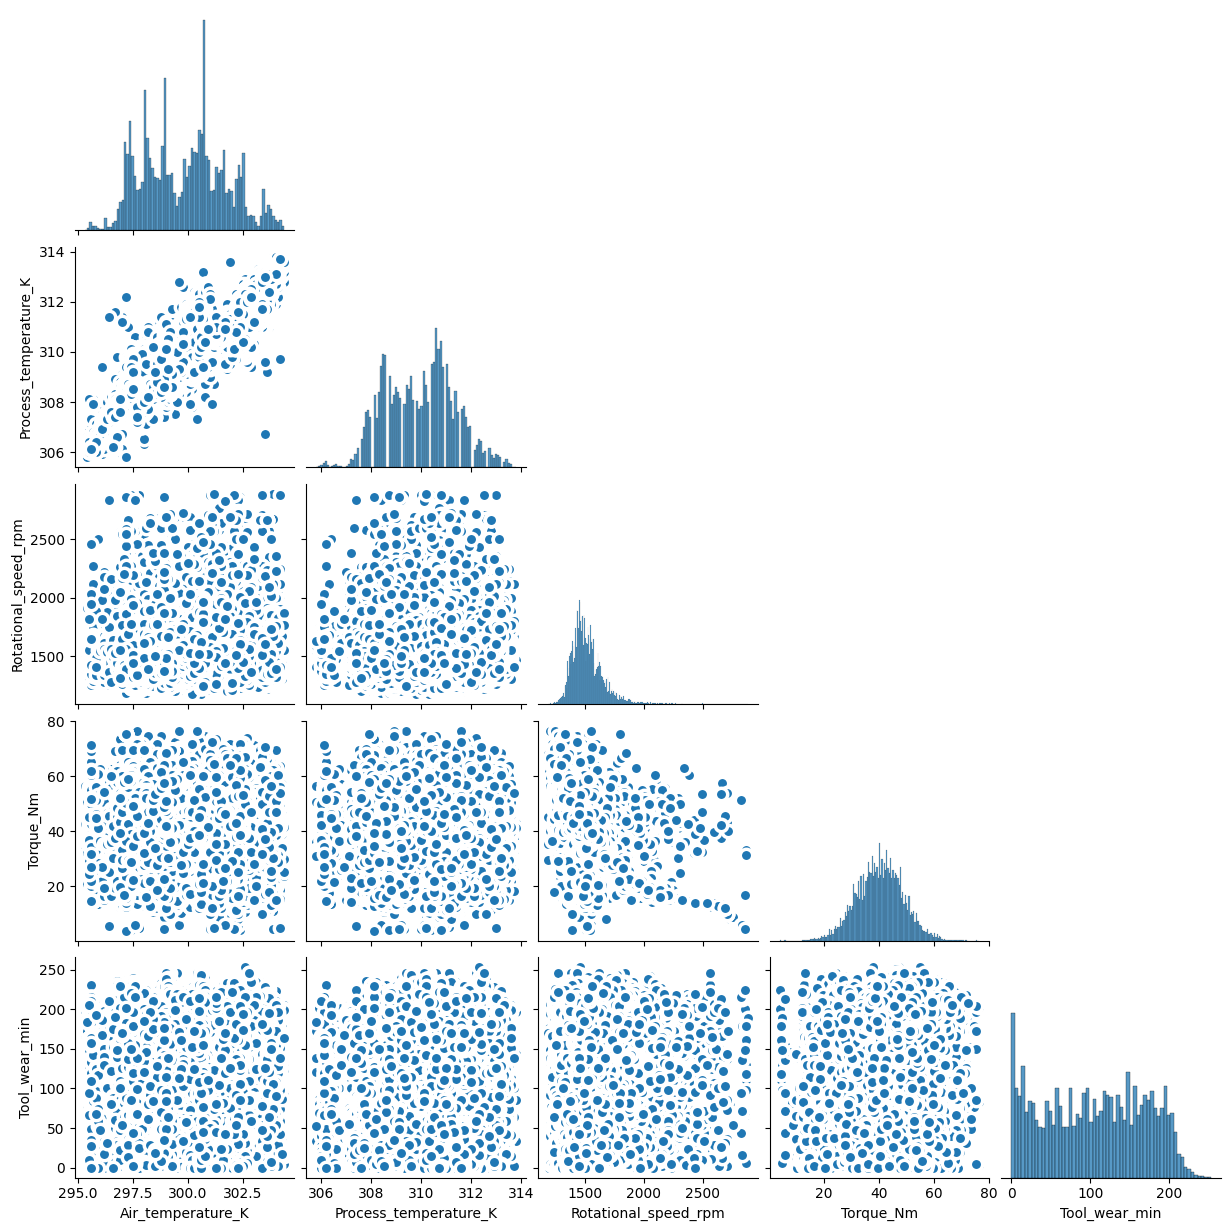

In [15]:
# matrix of scatter and histograms for each feature of the training data 
sns.pairplot(data=X_train.iloc[:,1:6], corner=True, plot_kws={'s':80, 'edgecolor':"white", 'linewidth':2.5})
plt.show()


### Missing values

In [16]:
# Table with the number of missing values for each feature or nan values
X_train.isnull().sum()  

Product_ID               0
Air_temperature_K        0
Process_temperature_K    0
Rotational_speed_rpm     0
Torque_Nm                0
Tool_wear_min            0
Machine_failure          0
TWF                      0
HDF                      0
PWF                      0
OSF                      0
RNF                      0
Type_H                   0
Type_L                   0
Type_M                   0
dtype: int64

### Null values

In [17]:
# Nan values in the training data
X_train.isna().sum()

Product_ID               0
Air_temperature_K        0
Process_temperature_K    0
Rotational_speed_rpm     0
Torque_Nm                0
Tool_wear_min            0
Machine_failure          0
TWF                      0
HDF                      0
PWF                      0
OSF                      0
RNF                      0
Type_H                   0
Type_L                   0
Type_M                   0
dtype: int64

### Duplicated values

In [18]:
## Duplicate values in the training data
X_train.duplicated().sum()

1134

### Unique values

In [19]:
X_train.nunique().sort_values()

Machine_failure             2
TWF                         2
HDF                         2
PWF                         2
OSF                         2
RNF                         2
Type_H                      2
Type_L                      2
Type_M                      2
Process_temperature_K      81
Air_temperature_K          95
Tool_wear_min             246
Torque_Nm                 611
Rotational_speed_rpm      952
Product_ID               9976
dtype: int64

## Training and Original datsaset concat

In [20]:
# Shapes of X_train and X_original
print('Shape of the training data: ', X_train.shape)
print('Shape of the original data: ', X_original.shape)

Shape of the training data:  (136429, 15)
Shape of the original data:  (10000, 15)


In [21]:
X_total = pd.concat([X_train, X_original], axis=0)

In [39]:
# Table with cuplicated observations in the training data ordered by the first column
X_train[X_train.duplicated(keep=False)].sort_values(by=X_train.columns[0])

,Product_ID,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Machine_failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
117626,15016,298.4,308.1,1495,46.0,204,0,0,0,0,0,0,0,0,1
21263,15016,298.4,308.1,1495,46.0,204,0,0,0,0,0,0,0,0,1
17640,15184,297.8,308.5,1499,41.9,196,0,0,0,0,0,0,0,0,1
30276,15184,297.8,308.5,1499,41.9,196,0,0,0,0,0,0,0,0,1
35436,15226,297.6,308.1,1552,40.9,90,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128857,57161,298.7,308.5,1559,36.1,190,0,0,0,0,0,0,0,1,0
131832,57161,298.7,308.5,1559,36.1,190,0,0,0,0,0,0,0,1,0
83688,57163,298.7,308.4,1359,47.8,195,0,0,0,0,0,0,0,1,0
25814,57163,298.7,308.4,1359,47.8,195,0,0,0,0,0,0,0,1,0


In [40]:
# Table with cuplicated observations in the X_total data ordered by the first column
X_total[X_total.duplicated(keep=False)].sort_values(by=X_total.columns[0])

,Product_ID,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Machine_failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
117626,15016,298.4,308.1,1495,46.0,204,0,0,0,0,0,0,0,0,1
21263,15016,298.4,308.1,1495,46.0,204,0,0,0,0,0,0,0,0,1
17640,15184,297.8,308.5,1499,41.9,196,0,0,0,0,0,0,0,0,1
30276,15184,297.8,308.5,1499,41.9,196,0,0,0,0,0,0,0,0,1
35436,15226,297.6,308.1,1552,40.9,90,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128857,57161,298.7,308.5,1559,36.1,190,0,0,0,0,0,0,0,1,0
131832,57161,298.7,308.5,1559,36.1,190,0,0,0,0,0,0,0,1,0
83688,57163,298.7,308.4,1359,47.8,195,0,0,0,0,0,0,0,1,0
25814,57163,298.7,308.4,1359,47.8,195,0,0,0,0,0,0,0,1,0


In [22]:
X_total.shape

(146429, 15)

## Feature engineering 

In [23]:
X_train_FE = pd.DataFrame(X_train)
X_test_FE = pd.DataFrame(X_test)
X_total_FE = pd.DataFrame(X_total)

### Temperature relation

In [24]:
def feature_engineering(df):
    df['RelationTemperature'] = df['Air_temperature_K'] / df['Process_temperature_K']
    df['TorqueRPM'] = df['Torque_Nm'] / df['Rotational_speed_rpm']
    df['WearRPM'] = df['Tool_wear_min'] / df['Rotational_speed_rpm']
    df['ToolWearTorque'] = df['Tool_wear_min'] / df['Torque_Nm']

    for col in ['Torque_Nm', 'Tool_wear_min', 'Rotational_speed_rpm']:
        df[f'{col}_B'] = pd.cut(df[col], bins=20)
        df[f'{col}_B'] = df[f'{col}_B'].cat.codes + 1

    df['TotalF'] = df['TWF'] + df['HDF'] + df['PWF'] + df['OSF'] + df['RNF']
    
    return df

X_train_FE = feature_engineering(X_train_FE)
X_test_FE = feature_engineering(X_test_FE)
X_total_FE = feature_engineering(X_total_FE)

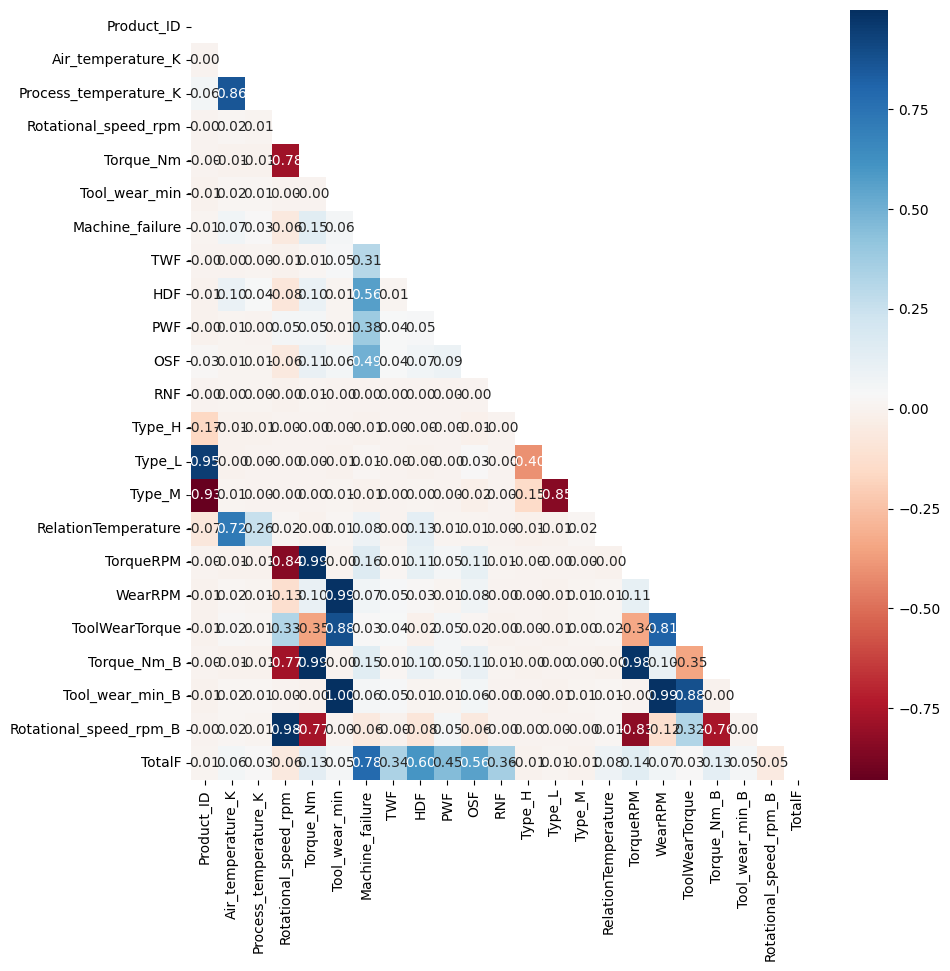

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

corr = X_train_FE.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap='RdBu', annot=True, fmt='.2f')
plt.rcParams['figure.figsize'] = (20, 20)
plt.show()

# Feature selection

## RFECV - Recursive Feature Elimination with Cross-Validation

In [28]:
X_train_FE.head()

,Product_ID,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Machine_failure,TWF,HDF,PWF,...,Type_L,Type_M,RelationTemperature,TorqueRPM,WearRPM,ToolWearTorque,Torque_Nm_B,Tool_wear_min_B,Rotational_speed_rpm_B,TotalF
0,50096,300.6,309.6,1596,36.1,140,0,0,0,0,...,1,0,0.970930,0.022619,0.087719,3.878116,9,12,5,0
1,20343,302.6,312.1,1759,29.1,200,0,0,0,0,...,0,1,0.969561,0.016543,0.113701,6.872852,7,16,7,0
2,49454,299.3,308.5,1805,26.5,25,0,0,0,0,...,1,0,0.970178,0.014681,0.013850,0.943396,7,2,8,0
3,53355,301.0,310.9,1524,44.3,197,0,0,0,0,...,1,0,0.968157,0.029068,0.129265,4.446953,12,16,5,0
4,24050,298.0,309.0,1641,35.4,34,0,0,0,0,...,0,1,0.964401,0.021572,0.020719,0.960452,9,3,6,0


In [29]:
ColumnsToDrop = ['Product_ID', 'RNF', 'Type_H']

X_train_FR_RFECV = X_train_FE.drop(ColumnsToDrop, axis=1)
X_test_FR_RFECV  = X_test_FE.drop(ColumnsToDrop, axis=1)

In [30]:
X_train_FR_RFECV.head()

,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Machine_failure,TWF,HDF,PWF,OSF,Type_L,Type_M,RelationTemperature,TorqueRPM,WearRPM,ToolWearTorque,Torque_Nm_B,Tool_wear_min_B,Rotational_speed_rpm_B,TotalF
0,300.6,309.6,1596,36.1,140,0,0,0,0,0,1,0,0.970930,0.022619,0.087719,3.878116,9,12,5,0
1,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,1,0.969561,0.016543,0.113701,6.872852,7,16,7,0
2,299.3,308.5,1805,26.5,25,0,0,0,0,0,1,0,0.970178,0.014681,0.013850,0.943396,7,2,8,0
3,301.0,310.9,1524,44.3,197,0,0,0,0,0,1,0,0.968157,0.029068,0.129265,4.446953,12,16,5,0
4,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,1,0.964401,0.021572,0.020719,0.960452,9,3,6,0


# Results saving

In [31]:
X_train_FR_RFECV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Air_temperature_K       136429 non-null  float64
 1   Process_temperature_K   136429 non-null  float64
 2   Rotational_speed_rpm    136429 non-null  int64  
 3   Torque_Nm               136429 non-null  float64
 4   Tool_wear_min           136429 non-null  int64  
 5   Machine_failure         136429 non-null  int64  
 6   TWF                     136429 non-null  int64  
 7   HDF                     136429 non-null  int64  
 8   PWF                     136429 non-null  int64  
 9   OSF                     136429 non-null  int64  
 10  Type_L                  136429 non-null  int32  
 11  Type_M                  136429 non-null  int32  
 12  RelationTemperature     136429 non-null  float64
 13  TorqueRPM               136429 non-null  float64
 14  WearRPM             

In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Product_ID             136429 non-null  int32  
 1   Air_temperature_K      136429 non-null  float64
 2   Process_temperature_K  136429 non-null  float64
 3   Rotational_speed_rpm   136429 non-null  int64  
 4   Torque_Nm              136429 non-null  float64
 5   Tool_wear_min          136429 non-null  int64  
 6   Machine_failure        136429 non-null  int64  
 7   TWF                    136429 non-null  int64  
 8   HDF                    136429 non-null  int64  
 9   PWF                    136429 non-null  int64  
 10  OSF                    136429 non-null  int64  
 11  RNF                    136429 non-null  int64  
 12  Type_H                 136429 non-null  int32  
 13  Type_L                 136429 non-null  int32  
 14  Type_M                 136429 non-nu

In [33]:
X_train_FE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Product_ID              136429 non-null  int32  
 1   Air_temperature_K       136429 non-null  float64
 2   Process_temperature_K   136429 non-null  float64
 3   Rotational_speed_rpm    136429 non-null  int64  
 4   Torque_Nm               136429 non-null  float64
 5   Tool_wear_min           136429 non-null  int64  
 6   Machine_failure         136429 non-null  int64  
 7   TWF                     136429 non-null  int64  
 8   HDF                     136429 non-null  int64  
 9   PWF                     136429 non-null  int64  
 10  OSF                     136429 non-null  int64  
 11  RNF                     136429 non-null  int64  
 12  Type_H                  136429 non-null  int32  
 13  Type_L                  136429 non-null  int32  
 14  Type_M              

In [34]:
# Submission to a file
## Training data
X_train.to_csv('data/X_train.csv', index=False)
X_train_FE.to_csv('data/X_train_FE.csv', index=False)
## Test data
X_test.to_csv('data/X_test.csv', index=False)
X_test_FE.to_csv('data/X_test_FE.csv', index=False)

## Original data concatenated with the training data
X_total.to_csv('data/X_total.csv', index=False)
X_total_FE.to_csv('data/X_total_FE.csv', index=False)


# Training data with Feature reduction
## RFECV - Recursive Feature Elimination with Cross-Validation
X_train_FR_RFECV.to_csv('data/X_train_FR.csv', index=False)
X_test_FR_RFECV.to_csv('data/X_test_FR.csv', index=False)

In [23]:
## Original data CAT 
X_train_CAT.to_csv('data/X_train_CAT.csv', index=False)
X_test_CAT.to_csv('data/X_test_CAT.csv', index=False)
